# Ejercicios Introduccion Numeros complejos


## Exercise 1: Basic Complex Number Operations
1. Manually calculate and then verify using Python the result of `(3 + 4j) + (1 - 2j)`, `(5 + 6j) * (7 - 8j)`, and `(2 - 3j) / (1 + 4j)`.
2. Find the conjugate and modulus of `(3 - 4j)`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 1.
print((3 + 4j) + (1 - 2j))
print((5 + 6j) * (7 - 8j))
print((2 + 3j) * (1 - 4j))

(4+2j)
(83+2j)
(14-5j)


In [2]:
#2.
z1 = 3 - 4j
print("Conjugate of z1:", z1.conjugate())
print("Modulus of z1:", abs(z1))

Conjugate of z1: (3+4j)
Modulus of z1: 5.0


## Exercise 2: Visualizing Complex Operations
1. Write a Python function to plot a complex number on the complex plane. Use it to plot `(3 + 4j)` and its conjugate.
2. Extend the function to show addition and multiplication of two complex numbers graphically.

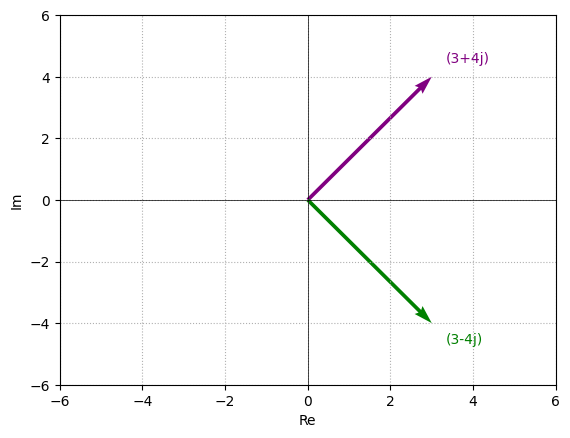

In [6]:

import matplotlib.pyplot as plt

def plot_complex(z, show_conjugate=True):
    plt.axhline(0, color='k', lw=0.5)
    plt.axvline(0, color='k', lw=0.5)
    lim = max(abs(z.real), abs(z.imag)) + 2
    plt.xlim(-lim, lim); plt.ylim(-lim, lim)
    plt.grid(True, linestyle=':')

    def draw(w, color, label, dy=10):
        plt.quiver(0, 0, w.real, w.imag, angles='xy', scale_units='xy', scale=1, color=color)
        plt.annotate(label, (w.real, w.imag), textcoords="offset points", xytext=(10,dy), color=color)

    draw(z, 'purple', str(z), 10)
    if show_conjugate: 
        draw(z.conjugate(), 'green', str(z.conjugate()), -15)

    plt.xlabel('Re'); plt.ylabel('Im'); plt.show()

# Ejemplo
plot_complex(3+4j)



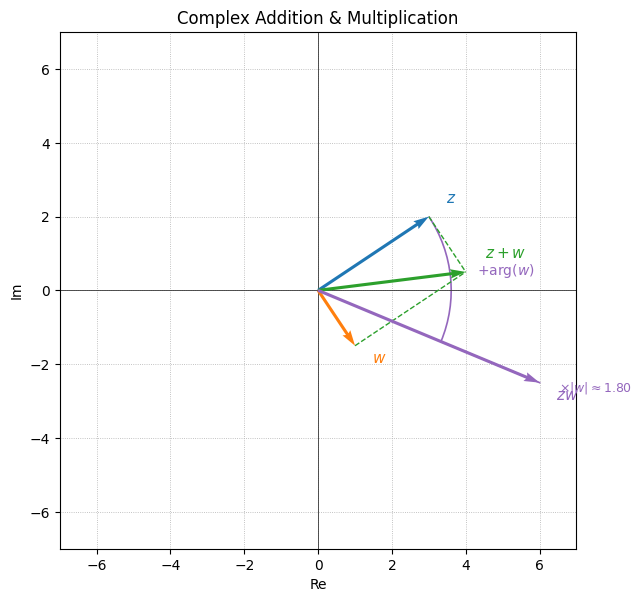

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def plot_complex_ops(z, w, show_conjugates=False):
    s, p = z + w, z * w
    pts = np.array([0+0j, z, w, s, p])
    R = max(5, np.max(np.abs(np.real(pts))) + 1, np.max(np.abs(np.imag(pts))) + 1)

    fig, ax = plt.subplots(figsize=(6.5, 6.5))
    ax.axhline(0, c='0.2', lw=0.6); ax.axvline(0, c='0.2', lw=0.6)
    ax.set(xlim=(-R, R), ylim=(-R, R), xlabel='Re', ylabel='Im')
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True, ls=':', lw=0.6)

    def arr(v, color, label, dx=12, dy=5, size=11):
        ax.quiver(0, 0, v.real, v.imag, angles='xy', scale_units='xy', scale=1,
                  color=color, width=0.006, zorder=3)
        ax.annotate(label, (v.real, v.imag), xytext=(dx, dy),
                    textcoords='offset points', color=color,
                    fontsize=size, weight='medium')

    # Main vectors
    arr(z, '#1f77b4', r'$z$', dy=10)
    arr(w, '#ff7f0e', r'$w$', dy=-12)
    arr(s, '#2ca02c', r'$z+w$', dx=14, dy=10)
    arr(p, '#9467bd', r'$zw$', dx=12, dy=-12)

    # Addition: parallelogram (dashed guides)
    ax.plot([z.real, s.real], [z.imag, s.imag], ls='--', lw=1, c='#2ca02c')
    ax.plot([w.real, s.real], [w.imag, s.imag], ls='--', lw=1, c='#2ca02c')

    # Multiplication: rotation (+arg w) and scaling (×|w|)
    ang_z, ang_p = np.angle(z), np.angle(p)
    rz, rp, rw = np.abs(z), np.abs(p), np.abs(w)

    arc = Arc((0, 0), 2*rz, 2*rz,
              angle=0, theta1=np.degrees(min(ang_z, ang_p)),
              theta2=np.degrees(max(ang_z, ang_p)),
              lw=1.2, ec='#9467bd')
    ax.add_patch(arc)
    mid_ang = (ang_z + ang_p) / 2
    ax.annotate(r'$+\arg(w)$', (1.2*rz*np.cos(mid_ang), 1.2*rz*np.sin(mid_ang)),
                fontsize=10, color='#9467bd')

    ax.plot([rz*np.cos(ang_p), rp*np.cos(ang_p)],
            [rz*np.sin(ang_p), rp*np.sin(ang_p)],
            lw=1.2, c='#9467bd')
    ax.annotate(r'$\times |w| \approx %.2f$' % rw,
                (rp*np.cos(ang_p), rp*np.sin(ang_p)),
                xytext=(14, -6), textcoords='offset points',
                fontsize=9, color='#9467bd')

    ax.set_title('Complex Addition & Multiplication', fontsize=12)
    plt.tight_layout(); plt.show()

# Example
plot_complex_ops(3+2j, 1-1.5j)


## Exercise 3: Exploring the Mandelbrot Set
1. Modify the provided Mandelbrot set code to change its zoom level and center point. Observe how the fractal pattern changes.
2. Experiment with different values of `max_iter` and observe the effect on the fractal's detail and computation time.

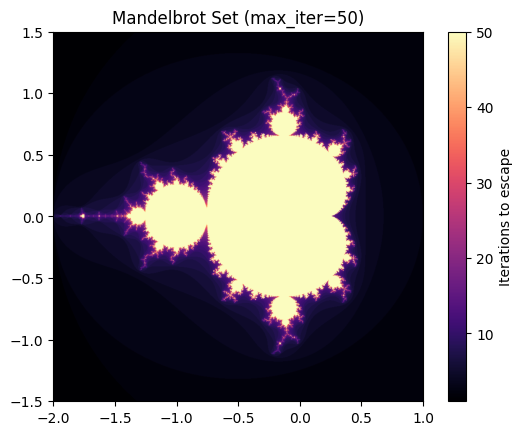

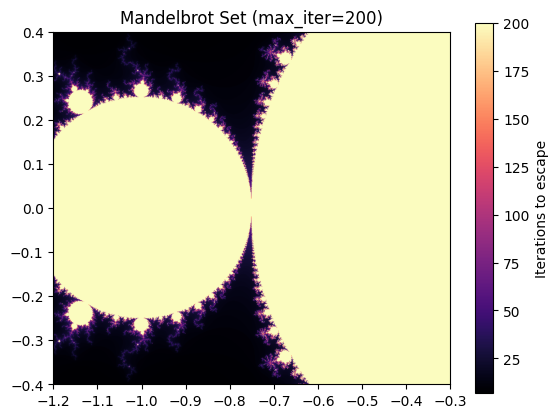

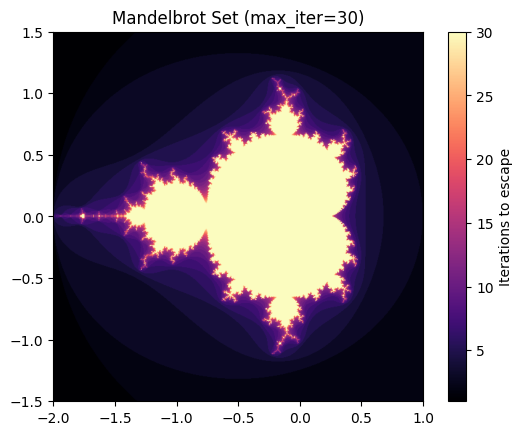

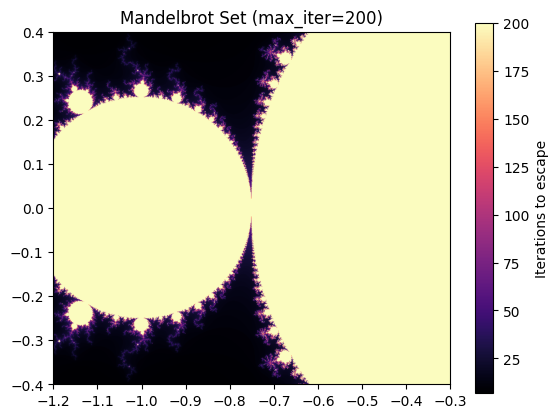

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    """Check how many iterations before |z| > 2 (escape test)."""
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:  # point escapes
            return n
        z = z*z + c
    return max_iter  # did not escape within max_iter

def mandelbrot_image(xmin, xmax, ymin, ymax, pixels=800, max_iter=50):
    """
    Generate and plot Mandelbrot set in the region [xmin,xmax] × [ymin,ymax].
    
    Parameters let you:
      - Change zoom & center (by adjusting xmin, xmax, ymin, ymax).
      - Change detail & speed (by adjusting max_iter).
    """
    # Create grid of complex numbers
    x = np.linspace(xmin, xmax, pixels)
    y = np.linspace(ymin, ymax, pixels)
    xx, yy = np.meshgrid(x, y)
    c = xx + yy*1j

    # Compute escape times for each grid point
    mandelbrot_set = np.array([mandelbrot(ci, max_iter) for ci in c.ravel()]).reshape(c.shape)

    # Plot result
    plt.imshow(mandelbrot_set, extent=[xmin, xmax, ymin, ymax], cmap="magma")
    plt.colorbar(label="Iterations to escape")
    plt.title(f"Mandelbrot Set (max_iter={max_iter})")
    plt.show()

# ===========================================================
# EXERCISE 3: Exploring the Mandelbrot Set
# ===========================================================

# 1️⃣ Default view (the whole set, centered at (-0.5,0))
mandelbrot_image(-2, 1, -1.5, 1.5, pixels=800, max_iter=50)

# 1️⃣ Change zoom level and center point:
#    - This zooms into the region around (-0.75, 0)
#    - You should see new details (Seahorse Valley)

mandelbrot_image(-1.2, -0.3, -0.4, 0.4, pixels=800, max_iter=200)

# 2️⃣ Change max_iter (detail level):
#    - With low max_iter = 30 → edges look blocky / less detailed
mandelbrot_image(-2, 1, -1.5, 1.5, pixels=600, max_iter=30)

#    - With high max_iter = 500 → edges and spirals are very detailed, but takes longer
mandelbrot_image(-1.2, -0.3, -0.4, 0.4, pixels=800, max_iter=200)


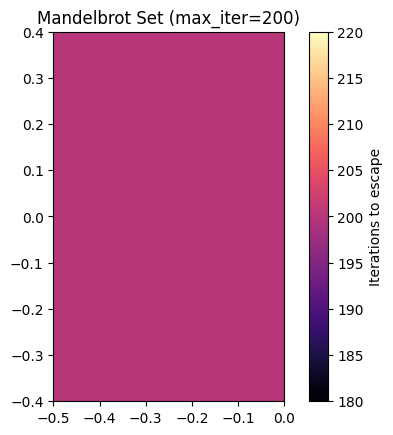

In [ ]:
mandelbrot_image(-0.5, -0, -0.4, 0.4, pixels=800, max_iter=200)


## Exercise 4: Creating a Julia Set
1. Implement a Julia set generator. Use a constant like `-0.4 + 0.6j` for the iteration `z = z*z + constant`.
2. Explore how changing the constant changes the pattern of the Julia set.

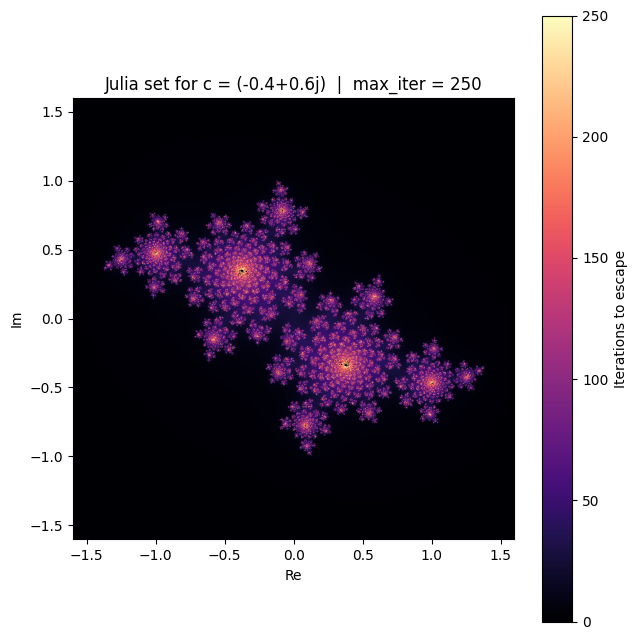

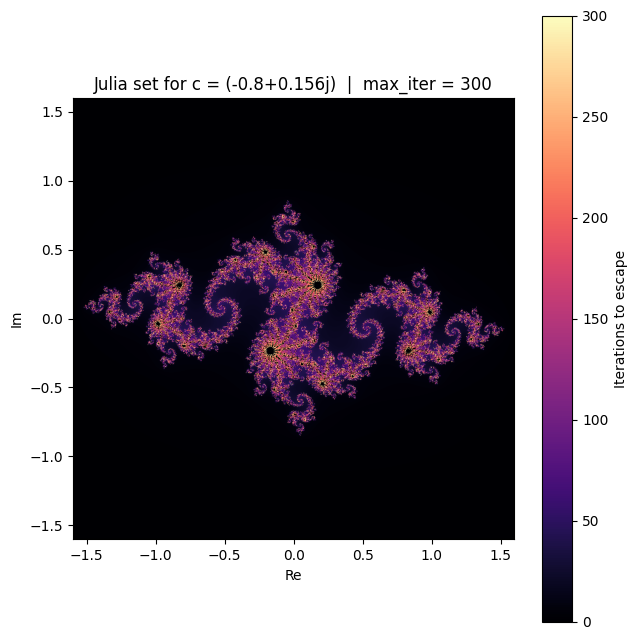

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Exercise 4 — Julia Set
# ------------------------------------------------------------

def julia_image(c, xmin=-1.6, xmax=1.6, ymin=-1.6, ymax=1.6,
                pixels=900, max_iter=200, cmap="magma"):
    """
    IMPLEMENTATION (Task 1):
      Generate and plot a Julia set for the iteration z <- z^2 + c.
      The parameter 'c' is the constant in the recurrence.

    EXPLORATION (Task 2):
      Change 'c' (the constant) and observe how the resulting
      Julia set's connectivity and filigree change.
    """
    # Grid in the complex plane
    x = np.linspace(xmin, xmax, pixels)
    y = np.linspace(ymin, ymax, pixels)
    xx, yy = np.meshgrid(x, y)
    z = xx + 1j*yy

    # Vectorized escape-time iteration
    counts = np.zeros(z.shape, dtype=int)     # when each point escapes
    mask = np.ones(z.shape, dtype=bool)       # points still iterating

    for n in range(max_iter):
        # Iterate only the points that haven't escaped yet
        z[mask] = z[mask]*z[mask] + c

        # Points that have just escaped
        escaped = np.abs(z) > 2
        newly_escaped = escaped & mask
        counts[newly_escaped] = n + 1

        # Keep only those that haven't escaped
        mask &= ~newly_escaped
        if not mask.any():
            break

    # Plot
    plt.figure(figsize=(6.5, 6.5))
    plt.imshow(counts, extent=[xmin, xmax, ymin, ymax], origin="lower", cmap=cmap)
    plt.colorbar(label="Iterations to escape")
    plt.title(f"Julia set for c = {c}  |  max_iter = {max_iter}")
    plt.xlabel("Re"); plt.ylabel("Im")
    plt.tight_layout(); plt.show()


# ------------------------------------------------------------
# HOW THIS FULFILLS THE EXERCISE
# ------------------------------------------------------------

# 1) IMPLEMENT a Julia set with the requested constant:
#    (Task 1: uses z <- z^2 + c with c = -0.4 + 0.6j)
julia_image(c=-0.4 + 0.6j, max_iter=250)

# 2) EXPLORE how changing the constant changes the pattern:
#    (Task 2: try several 'c' values; note how the structure varies)

# Connected, filigreed lobes (inside the Mandelbrot set)
julia_image(c=-0.8 + 0.156j, max_iter=300)




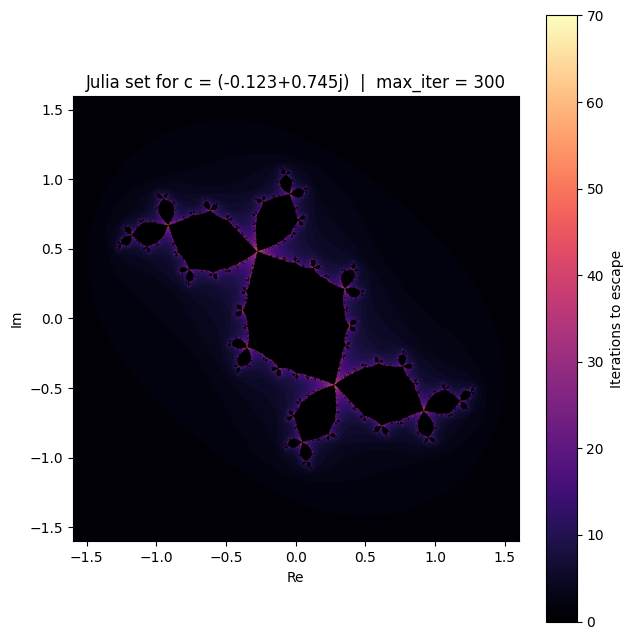

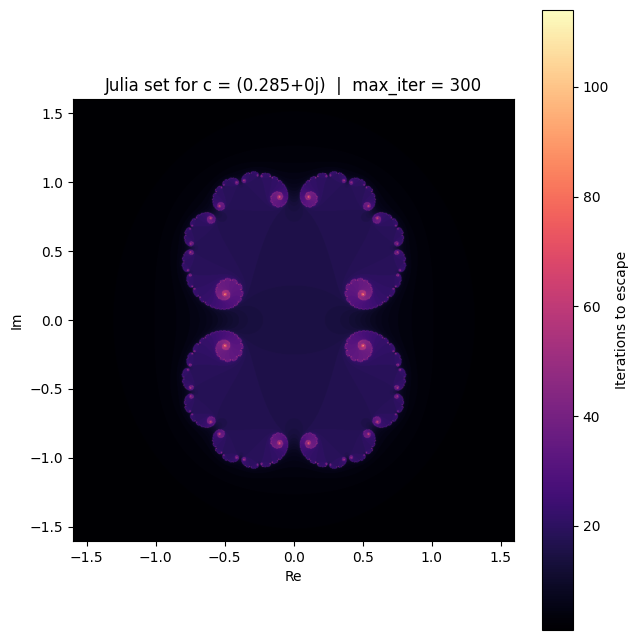

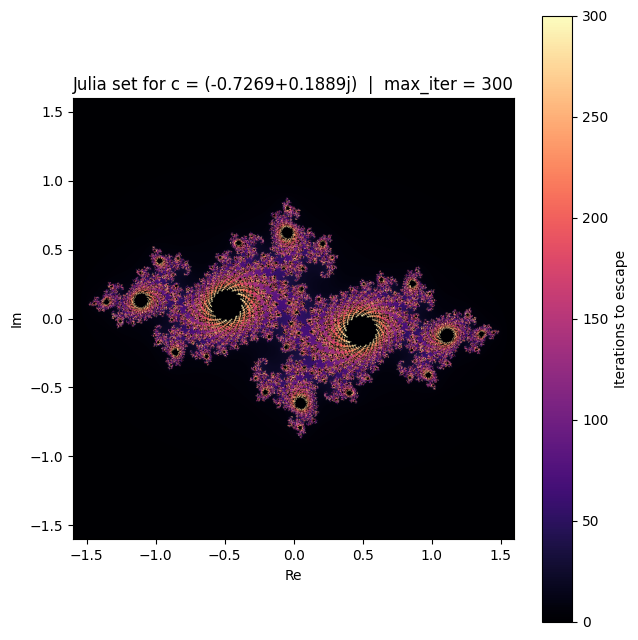

In [ ]:
# Douady “rabbit” style (airy lobes)
julia_image(c=-0.123 + 0.745j, max_iter=300)

# More dendritic pattern
julia_image(c=0.285 + 0.0j, max_iter=300)

# Seahorse/filament vibes (tweak real/imag parts to taste)
julia_image(c=-0.7269 + 0.1889j, max_iter=300)

# Optional: zoom further into any interesting region by narrowing [xmin,xmax]×[ymin,ymax]
# Example zoom (same c, deeper look):
# julia_image(c=-0.123 + 0.745j, xmin=-0.6, xmax=0.2, ymin=0.1, ymax=0.9, max_iter=600)


# Ejercicios Matrices y Vectores complejos

## Complex Column Vector Operations

### Exercise 1: Sum of Two Complex Vectors
Given two complex vectors
$ v1 = \begin{bmatrix} 1 + 2i \\ 3 - i \end{bmatrix} $
and
$ v2 = \begin{bmatrix} 2 - i \\ 4 + 2i \end{bmatrix} $,
find their sum.

In [ ]:
v1 = np.array([[1 + 2j], [3 - 1j]])
v2 = np.array([[2 - 1j], [4 + 2j]])

v1 + v2


array([[3.+1.j],
       [7.+1.j]])

### Exercise 2: Negation of a Complex Vector
Given a complex vector
$ v = \begin{bmatrix} 2 + 3i \\ 1 - 2i \end{bmatrix} $,
find its negation.

In [ ]:
v = np.array([[2 + 3j], [1 - 2j]])

-v

array([[-2.-3.j],
       [-1.+2.j]])

### Exercise 3: Multiplication of a Complex Vector by a Scalar
Multiply the complex vector
$ v = \begin{bmatrix} 1 - i \\ 2 + 2i \end{bmatrix} $
by the complex scalar $$ 3 + i $$.

In [ ]:
v = np.array([[1 - 1j], [2 + 2j]])
scalar = 3 + 1j

v* scalar

array([[4.-2.j],
       [4.+8.j]])

### Exercise 4: Transpose of a Complex Vector
Find the transpose of the complex vector
$ v = \begin{bmatrix} 2 - i \\ 3 + 4i \end{bmatrix} $.

In [ ]:
v = np.array([[2 - 1j, 2], [3 + 4j, 3]])
display(v,
v.T)

array([[2.-1.j, 2.+0.j],
       [3.+4.j, 3.+0.j]])

array([[2.-1.j, 3.+4.j],
       [2.+0.j, 3.+0.j]])

### Exercise 5: Conjugate of a Complex Vector
Compute the conjugate of the complex vector
$ v = \begin{bmatrix} 1 + i \\ 2 - 3i \end{bmatrix} $.

In [25]:
v_5 = np.array([[1 + 1j], [2 - 3j]])
np.conjugate(v_5)

array([[1.-1.j],
       [2.+3.j]])

### Exercise 6: Adjunct (Conjugate Transpose) of a Complex Vector
Find the adjunct (or conjugate transpose) of the complex vector
$ v = \begin{bmatrix} 1 - 2i \\ 3 + i \end{bmatrix} $.

In [26]:
v_6 = np.array([[1 - 2j], [3 +1j]])
np.conjugate(v_6.T)

array([[1.+2.j, 3.-1.j]])

## Complex Square Matrix Operations

### Exercise 7: Sum of Two Complex Matrices
Given two complex matrices
$ m1 = \begin{bmatrix} 1 + i & 2 - i \\ 3 + 2i & 4 \end{bmatrix} $
and
$ m2 = \begin{bmatrix} 2 - 3i & 1 \\ i & 2 + 2i \end{bmatrix} $,
calculate their sum.

In [27]:
m1 = np.array([[1 + 1j, 2 - 1j], [3 + 2j, 4]])
m2 = np.array([[2 - 3j, 1], [1j, 2 + 2j]])
m1 + m2

array([[3.-2.j, 3.-1.j],
       [3.+3.j, 6.+2.j]])

### Exercise 8: Negation of a Complex Matrix
Find the negation of the complex matrix
$ m = \begin{bmatrix} 2 + i & 3 \\ 1 - i & 2 + 2i \end{bmatrix} $.

In [28]:
m_8 = np.array([[2 + 1j, 3],
                [1 - 1j, 2 + 2j]])
-m_8

array([[-2.-1.j, -3.-0.j],
       [-1.+1.j, -2.-2.j]])

### Exercise 9: Multiplication of a Complex Matrix by a Scalar
Multiply the complex matrix
$ m = \begin{bmatrix} 1 - i & 2 \\ 3 + i & 4 - 2i \end{bmatrix} $
by the complex scalar $$ 2 + 3i $$.

In [29]:
m_9 = np.array([[1 - 1j, 2],
                [3 + 1j, 4 - 2j]])
c = 2 + 3j
c * m_9

array([[ 5. +1.j,  4. +6.j],
       [ 3.+11.j, 14. +8.j]])

### Exercise 10: Conjugate of a Complex Matrix
Compute the conjugate of the complex matrix
$ m = \begin{bmatrix} 1 + i & 2 \\ 3 - i & 4 + 2i \end{bmatrix} $.

In [30]:
m_10 = np.array([[1 + 1j, 2],
                 [3 - 1j, 4 + 2j]])
np.conjugate(m_10)

array([[1.-1.j, 2.-0.j],
       [3.+1.j, 4.-2.j]])

### Exercise 11: Transpose of a Complex Matrix
Find the transpose of the complex matrix
$ m = \begin{bmatrix} 1 - i & 2 + 2i \\ 3 & 4 - i \end{bmatrix} $.

In [ ]:
m_11 = np.array([[1 - 1j, 2 + 2j],
                 [3, 4 -1j]])
m_11.T


array([[1.-1.j, 3.+0.j],
       [2.+2.j, 4.-1.j]])

### Exercise 12: Adjunct (Conjugate Transpose) of a Complex Matrix
Calculate the adjunct (or conjugate transpose) of the complex matrix
$ m = \begin{bmatrix} 1 + 2i & 3 - i \\ 4 & 5 + i \end{bmatrix} $.

In [31]:
m_12 = np.array([[1 + 2j, 3 - 1j],
                 [4, 5 + 1j]])
np.conjugate(m_12.T)

array([[1.-2.j, 4.-0.j],
       [3.+1.j, 5.-1.j]])

### Exercise 13: Checking the Dimensions of a Matrix
Determine the dimensions of the complex matrix
$ m = \begin{bmatrix} 1 - i & 2 \\ 3 + 2i & 4 - i \end{bmatrix} $.

In [32]:
m_13 = np.array([[1 - 1j, 2],
                 [3 + 2j, 4 - 1j]])
print(f"Dimension: {m_13.shape}")


Dimension: (2, 2)


## Multiplication of Matrices and Vectors

### Exercise 14: Multiplying a Complex Square Matrix by a Complex Column Vector

Multiply the complex square matrix
$ m = \begin{bmatrix} 1 + i & 2 - i \\ 3 & 4 + i \end{bmatrix} $
by the complex column vector
$ v = \begin{bmatrix} 2 - i \\ 1 + 3i \end{bmatrix} $.


In [33]:
m_14 = np.array([[1 + 1j, 2 - 2j],
                 [3, 4 + 1j]])
v_14 = np.array([[2 - 2j],
                 [1 + 3j]])
np.dot(m_14, v_14)

array([[12.+4.j],
       [ 7.+7.j]])

# Exercises on Complex Vector and Matrix Operations

## Exercise 1: Complex Internal Product for Column Vectors

Given two complex column vectors:

$$ \mathbf{a} = \begin{bmatrix} 1 + 2i \\ 3 - 4i \end{bmatrix}, \quad \mathbf{b} = \begin{bmatrix} 2 - i \\ -1 + 3i \end{bmatrix} $$

Calculate the complex internal product $ \langle \mathbf{a}, \mathbf{b} \rangle $.

In [35]:
a = np.array([[1 + 2j],
              [3 - 4j]])
b = np.array([[2 - 1j],
              [-1 + 3j]])
np.vdot(a, b)

np.complex128(-15+0j)

## Exercise 2: Complex Internal Product for Square Complex Matrices

Given two square complex matrices:

$$ A = \begin{bmatrix} 1+i & 2-2i \\ 3+3i & 4-i \end{bmatrix}, \quad B = \begin{bmatrix} 1-2i & 3+i \\ 4-4i & 2+2i \end{bmatrix} $$

Calculate the complex internal product $ \langle A, B \rangle $.

In [36]:
A = np.array([[1 + 1j, 2 - 2j],
              [3 + 3j, 4 - 1j]])
B = np.array([[1 - 2j, 3 + 1j],
              [4 - 4j, 2 + 2j]])

np.trace(np.dot(np.conjugate(A.T), B))

np.complex128(9-9j)

# Exercises on eigenvalues and eigenvectors

## Exercise 1: Compute Eigenvalues and Eigenvectors of a Real Matrix

Compute the eigenvalues and eigenvectors of the following real matrix:

$$
A = \begin{pmatrix}
4 & 1 \\
2 & 3
\end{pmatrix}
$$

**Hint:** Use `numpy.linalg.eig`.

In [37]:
A_1 = np.array([[4, 1],
              [3, 3]])

np.linalg.eig(A_1)

EigResult(eigenvalues=array([5.30277564, 1.69722436]), eigenvectors=array([[ 0.60889368, -0.3983218 ],
       [ 0.79325185,  0.91724574]]))

## Exercise 2: Eigenvalues and Eigenvectors of a Complex Matrix

Compute the eigenvalues and eigenvectors of the following complex matrix:

$$
B = \begin{pmatrix}
1 + 2i & 2 + 3i \\
4 + 5i & 6 + 7i
\end{pmatrix}
$$

where \(i\) is the imaginary unit.

**Hint:** Ensure your matrix is defined with complex numbers in Python using `dtype=complex`.

In [38]:
B_2 = np.array([[1 + 2j, 2 + 3j],
              [4 + 5j, 6 + 7j]])

eigenValuesComplex, eigenVectorsComplex = np.linalg.eig(B_2)

print(f"Eigenvalues: {eigenValuesComplex}")
print(f"Eigenvector: {eigenVectorsComplex}")



Eigenvalues: [-0.25519526-0.09363597j  7.25519526+9.09363597j]
Eigenvector: [[ 0.8280679 +0.j          0.35299759+0.04782692j]
 [-0.559984  -0.02686037j  0.93440103+0.j        ]]


## Exercise 3: Symmetric Matrix Eigendecomposition

Compute the eigenvalues and eigenvectors of the following symmetric matrix:

$$
C = \begin{pmatrix}
5 & 4 \\
4 & 5
\end{pmatrix}
$$

Discuss the properties of the eigenvectors and eigenvalues for symmetric matrices based on your results.

In [43]:
# ## Exercise 3: Symmetric Matrix Eigendecomposition

import numpy as np

# Define the symmetric matrix
C = np.array([[5, 4],
              [4, 5]])

# Compute eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(C)

print("Matrix C:\n", C)
print("\nEigenvalues:", eigvals)
print("\nEigenvectors (columns):\n", eigvecs)

# Normalize eigenvectors for clarity
eigvecs = eigvecs / np.linalg.norm(eigvecs, axis=0)

# Reconstruct C using Q Λ Q^T (spectral theorem)
Q = eigvecs
Lambda = np.diag(eigvals)
C_reconstructed = Q @ Lambda @ Q.T

print("\nReconstructed C (Q Λ Q^T):\n", C_reconstructed)

# Discussion
print("\n--- Discussion ---")
print("1. The eigenvalues are real (λ = 9 and λ = 1).")
print("2. The corresponding eigenvectors are orthogonal:")
print("   v1 ∝ (1,1), v2 ∝ (1,-1).")
print("3. Symmetric matrices are always orthogonally diagonalizable (C = QΛQ^T).")
print("4. Since both eigenvalues are positive, C is positive definite.")
print("5. Geometrically, C scales space by 9 along (1,1) and by 1 along (1,-1).")


Matrix C:
 [[5 4]
 [4 5]]

Eigenvalues: [9. 1.]

Eigenvectors (columns):
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Reconstructed C (Q Λ Q^T):
 [[5. 4.]
 [4. 5.]]

--- Discussion ---
1. The eigenvalues are real (λ = 9 and λ = 1).
2. The corresponding eigenvectors are orthogonal:
   v1 ∝ (1,1), v2 ∝ (1,-1).
3. Symmetric matrices are always orthogonally diagonalizable (C = QΛQ^T).
4. Since both eigenvalues are positive, C is positive definite.
5. Geometrically, C scales space by 9 along (1,1) and by 1 along (1,-1).



## Exercise 4: Plotting Matrix Transformations

Consider the matrix:

$$
T = \begin{pmatrix}
2 & 1 \\
1 & 3
\end{pmatrix}
$$

1. Plot the unit circle.
2. Apply the matrix \(T\) to transform the unit circle.
3. Plot the transformed figure.
4. Show graphically that the eigenvectors are only multiplied by an escalar when transformed. (Plot the eigen vectors and the transformed ones)

Explain how the matrix \(T\) transforms the unit circle based on the resulting plot.

**Hint:** Use `numpy` for matrix operations and `matplotlib` for plotting.

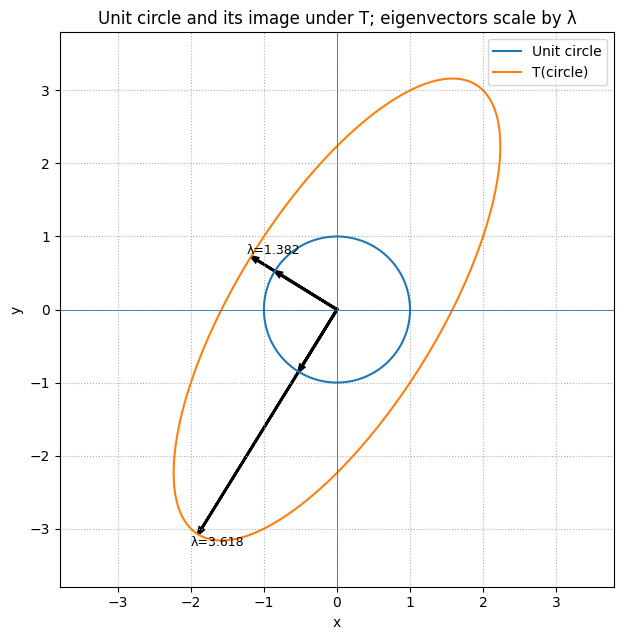

Eigenvalue λ1 = 1.38196601, eigenvector v1 = [-0.85065081  0.52573111]
Eigenvalue λ2 = 3.61803399, eigenvector v2 = [-0.52573111 -0.85065081]


In [42]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Exercise 4 — Plotting Matrix Transformations
# T transforms the plane: x ↦ T x
# ------------------------------------------------------------
T = np.array([[2, 1],
              [1, 3]])

# 1) Plot the unit circle
theta = np.linspace(0, 2*np.pi, 600)
circle = np.vstack([np.cos(theta), np.sin(theta)])  # shape (2, N)

# 2) Apply T to the unit circle  →  3) Plot the transformed figure (ellipse)
ellipse = T @ circle

# 4) Eigenvectors are scaled (not rotated) by T
#    Compute eigenpairs and plot v and T v (they lie on the same line).
eigvals, eigvecs = np.linalg.eig(T)  # columns of eigvecs are eigenvectors
# Normalize eigenvectors to unit length (for clean comparison on the unit circle)
V = eigvecs / np.linalg.norm(eigvecs, axis=0)

# Convenience: arrow drawer from origin
def arrow(ax, v, **kw):
    ax.arrow(0, 0, v[0], v[1], head_width=0.06, length_includes_head=True, **kw)

# Figure
fig, ax = plt.subplots(figsize=(6.5, 6.5))

# (1) Unit circle
ax.plot(circle[0], circle[1], label='Unit circle')

# (2)(3) Transformed set
ax.plot(ellipse[0], ellipse[1], label='T(circle)')

# (4) Eigenvectors and their images
for i in range(2):
    v = V[:, i]
    Tv = T @ v                 # = λ_i v  (same direction)
    arrow(ax, v, linewidth=2)  # eigenvector on unit circle
    arrow(ax, Tv, linewidth=2) # transformed eigenvector (scaled by λ_i)
    # Annotate with λ
    ax.text(*(1.05*Tv), f"λ={eigvals[i]:.4g}", fontsize=9)

# Axes & formatting
R = 1.2 * max(np.max(np.abs(circle)), np.max(np.abs(ellipse)))
ax.axhline(0, lw=0.6); ax.axvline(0, lw=0.6)
ax.set_aspect('equal', 'box')
ax.set_xlim(-R, R); ax.set_ylim(-R, R)
ax.set_xlabel('x'); ax.set_ylabel('y')
ax.grid(True, linestyle=':')
ax.legend(loc='upper right')
ax.set_title('Unit circle and its image under T; eigenvectors scale by λ')
plt.tight_layout()
plt.show()

# Print eigen info for clarity in the console
for i in range(2):
    print(f"Eigenvalue λ{i+1} = {eigvals[i]:.8f}, eigenvector v{i+1} = {V[:, i]}")


## Exercise 5: Diagonal Matrix Eigendecomposition

Compute the eigenvalues and eigenvectors of the following diagonal matrix:

$$
D = \begin{pmatrix}
7 & 0 \\
0 & -3
\end{pmatrix}
$$

Discuss the significance of the eigenvalues and eigenvectors for diagonal matrices.

In [44]:
# ## Exercise 5: Diagonal Matrix Eigendecomposition

import numpy as np

# Define the diagonal matrix
D = np.array([[7, 0],
              [0, -3]])

# Eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(D)

print("Matrix D:\n", D)
print("\nEigenvalues:", eigvals)
print("\nEigenvectors (columns):\n", eigvecs)

# --- Discussion ---
print("\n--- Discussion ---")
print("1. For a diagonal matrix, the eigenvalues are simply the diagonal entries: 7 and -3.")
print("2. The eigenvectors are the standard basis vectors:")
print("   • (1,0)ᵀ corresponds to λ=7")
print("   • (0,1)ᵀ corresponds to λ=-3")
print("3. Geometric meaning: stretching by 7 along the x-axis, and flipping+scaling by -3 along the y-axis.")


Matrix D:
 [[ 7  0]
 [ 0 -3]]

Eigenvalues: [ 7. -3.]

Eigenvectors (columns):
 [[1. 0.]
 [0. 1.]]

--- Discussion ---
1. For a diagonal matrix, the eigenvalues are simply the diagonal entries: 7 and -3.
2. The eigenvectors are the standard basis vectors:
   • (1,0)ᵀ corresponds to λ=7
   • (0,1)ᵀ corresponds to λ=-3
3. Geometric meaning: stretching by 7 along the x-axis, and flipping+scaling by -3 along the y-axis.


Los valores propios son los valores de las componentes en la diagonal y los vectores son las dimensiones correspondiente a ese valor.

# Exercises on Complex Vector and Matrix Operation

## Exercise 1: Complex Hermitian Matrices

Consider the matrix:

$$ H = \begin{bmatrix} 3 & 2+i \\ 2-i & 1 \end{bmatrix} $$

- Verify if $ H $ is a Hermitian matrix.
- If it is, find its eigenvalues.

In [45]:
# ## Exercise 1: Complex Hermitian Matrices

import numpy as np

# Matrix H
H = np.array([[3, 2+1j],
              [2-1j, 1]], dtype=complex)

# 1) Verify Hermitian: H == H* (conjugate transpose)
is_hermitian = np.allclose(H, H.conj().T)
print("H is Hermitian:", is_hermitian)

# 2) Eigenvalues (Hermitian ⇒ real). Use eigvalsh for Hermitian matrices
eigvals = np.linalg.eigvalsh(H)  # sorted ascending
print("Eigenvalues (numeric):", eigvals)

# Also show the closed-form values: 2 ± sqrt(6)
exact = np.array([2 - np.sqrt(6), 2 + np.sqrt(6)])
print("Eigenvalues (closed-form): 2 ± sqrt(6) =", exact)


H is Hermitian: True
Eigenvalues (numeric): [-0.44948974  4.44948974]
Eigenvalues (closed-form): 2 ± sqrt(6) = [-0.44948974  4.44948974]


## Exercise 2: Complex Unitary Matrices

Consider the matrix:

$$ U = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & i \\ i & 1 \end{bmatrix} $$

- Verify if $ U $ is a Unitary matrix.
- Compute $ UU^\dagger $ to confirm its Unitarity, where $ U^\dagger $ denotes the conjugate transpose of $ U $.

In [46]:
# ## Exercise 2: Complex Unitary Matrices

import numpy as np

# Define U
U = (1/np.sqrt(2)) * np.array([[1, 1j],
                                [1j, 1]], dtype=complex)

# 1) Verify if U is unitary: U U† = I
U_dagger = U.conj().T
UUd = U @ U_dagger

print("Matrix U:\n", U)
print("\nU† (conjugate transpose):\n", U_dagger)
print("\nU U†:\n", UUd)

# Check closeness to the identity
is_unitary = np.allclose(UUd, np.eye(2))
print("\nIs U unitary? ->", is_unitary)


Matrix U:
 [[0.70710678+0.j         0.        +0.70710678j]
 [0.        +0.70710678j 0.70710678+0.j        ]]

U† (conjugate transpose):
 [[0.70710678-0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678-0.j        ]]

U U†:
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Is U unitary? -> True


## Exercise 3: Tensor Product for Complex Vectors

Given the complex vectors:

$$ \mathbf{v} = \begin{bmatrix} 1+i \\ 2-i \end{bmatrix}, \quad \mathbf{w} = \begin{bmatrix} 1-2i \\ 3 \end{bmatrix} $$

Calculate the tensor product $ \mathbf{v} \otimes \mathbf{w} $.

In [ ]:
V = np.array([[1 + 1j],
              [2 - 1j]])
W = np.array([[1 - 2j],
              [3]])

np.kron(V, W)

array([[3.-1.j],
       [3.+3.j],
       [0.-5.j],
       [6.-3.j]])

## Exercise 4: Tensor Product for Complex Matrices

Given the matrices:

$$ M_1 = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \quad M_2 = \begin{bmatrix} i & 0 \\ 0 & -i \end{bmatrix} $$

Calculate the tensor product $ M_1 \otimes M_2 $.

In [ ]:
M1 = np.array([[0, 1],
               [1, 0]])

M2 = np.array([[1j, 0],
               [0, -1j]])

np.kron(M1, M2).shape, np.kron(M1, M2)

((4, 4),
 array([[0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
        [0.+0.j, 0.-0.j, 0.+0.j, 0.-1.j],
        [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.-1.j, 0.+0.j, 0.-0.j]]))

## Exercise 5: Modelling quantum computations with vectors and matrices

Using matrices and vectors, implement a model of the Mach/Zehnder interferometer.

![Mach-Zehnder interferometer](images/Mach-Zehnder-Interferometer.png)

## 1 

In [ ]:
import numpy as np

ket0 = np.array([1,0], dtype=complex)   # camino superior
ket1 = np.array([0,1], dtype=complex)   # camino inferior

H = (1/np.sqrt(2)) * np.array([[1,  1],
                               [1, -1]], dtype=complex)   # divisor de haz (beam splitter)
I2 = np.eye(2, dtype=complex)
Z  = np.array([[1, 0],
               [0,-1]], dtype=complex)  # fase π en el camino inferior (caso especial)

In [13]:
# estado inicial: fotón entra por el puerto superior  |0>
psi0 = ket0
psi0



array([1.+0.j, 0.+0.j])

In [14]:
# primer beam splitter  (H)
psi1 = H @ psi0
psi1

array([0.70710678+0.j, 0.70710678+0.j])

In [15]:
# fase relativa en el camino inferior
# Fase general φ: P(φ) = diag(1, e^{iφ})
phi = 0.0                        # cambia a 0, np.pi/2, np.pi, etc.
Pphi = np.diag([1, np.exp(1j*phi)])

psi2 = Pphi @ psi1
psi2

array([0.70710678+0.j, 0.70710678+0.j])

In [16]:
# segundo beam splitter  (H)
psi3 = H @ psi2
psi3

array([1.+0.j, 0.+0.j])

In [17]:
# probabilidades de detección en los dos detectores
# (puertos de salida |0> y |1>)
p0 = float(np.vdot(ket0, psi3) * np.vdot(ket0, psi3).conj()).real
p1 = float(np.vdot(ket1, psi3) * np.vdot(ket1, psi3).conj()).real
p0, p1, p0 + p1   # la suma debe ser ~1

C:\Users\aleja\AppData\Local\Temp\ipykernel_22264\749536363.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  p0 = float(np.vdot(ket0, psi3) * np.vdot(ket0, psi3).conj()).real
C:\Users\aleja\AppData\Local\Temp\ipykernel_22264\749536363.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  p1 = float(np.vdot(ket1, psi3) * np.vdot(ket1, psi3).conj()).real


(0.9999999999999996, 0.0, 0.9999999999999996)

## Exercise 6: Composing quantum systems

Using matrices and vectors, implement a model of the following circuit.

![Mach-Zehnder interferometer](images/Deutsch-Algorithm.png)

Use the following MAtrix for $U_f$:

![Mach-Zehnder interferometer](images/ExampleUf.png)

## 1

In [2]:
import numpy as np

# kets y compuertas
ket0 = np.array([1,0], dtype=complex)
ket1 = np.array([0,1], dtype=complex)

H = (1/np.sqrt(2)) * np.array([[1,  1],
                               [1, -1]], dtype=complex)
I2 = np.eye(2, dtype=complex)


In [3]:
#estado inicial |0>⊗|1>
psi0 = np.kron(ket0, ket1)   # orden de base: |00>,|01>,|10>,|11>
psi0



array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j])

In [4]:
HH = np.kron(H, H)
psi1 = HH @ psi0
psi1

array([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j])

In [5]:
# oráculos U_f explícitos (matrices 4x4)
# f0(x)=0 (constante)
Uf_f0 = np.array([
    [1,0,0,0],  # |00> -> |00>
    [0,1,0,0],  # |01> -> |01>
    [0,0,1,0],  # |10> -> |10>
    [0,0,0,1],  # |11> -> |11>
], dtype=complex)

# f1(x)=1 (constante)
Uf_f1 = np.array([
    [0,1,0,0],  # |00> -> |01>
    [1,0,0,0],  # |01> -> |00>
    [0,0,0,1],  # |10> -> |11>
    [0,0,1,0],  # |11> -> |10>
], dtype=complex)

# f(x)=x (balanceada)
Uf_id = np.array([
    [1,0,0,0],  # |00> -> |00>
    [0,1,0,0],  # |01> -> |01>
    [0,0,0,1],  # |10> -> |11>
    [0,0,1,0],  # |11> -> |10>
], dtype=complex)

# f(x)=1−x (balanceada)
Uf_not = np.array([
    [0,1,0,0],  # |00> -> |01>
    [1,0,0,0],  # |01> -> |00>
    [0,0,1,0],  # |10> -> |10>
    [0,0,0,1],  # |11> -> |11>
], dtype=complex)

In [ ]:
# elige el oráculo que quieras probar
Uf = Uf_id   # <-- cambia a Uf_f0, Uf_f1, Uf_id, Uf_not
psi2 = Uf @ psi1
psi2

array([ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j])

In [9]:
#  Hadamard al primer qubit (H⊗I)
HI = np.kron(H, I2)
psi3 = HI @ psi2
psi3

array([ 7.07106781e-01+0.j, -7.07106781e-01+0.j,  2.29934717e-17+0.j,
       -2.29934717e-17+0.j])

In [10]:
# probabilidades de medir el PRIMER qubit (0 o 1)
# base: |00>,|01>,|10>,|11>
amps = psi3.reshape(4)

p0 = np.sum(np.abs(amps[[0,1]])**2)  # primer qubit = 0
p1 = np.sum(np.abs(amps[[2,3]])**2)  # primer qubit = 1

p0, p1

(np.float64(0.9999999999999996), np.float64(1.0573994819069698e-33))